<a href="https://colab.research.google.com/github/Chutki319239/ELEVATE-AI-ML-task6-K-nearest-neighbours-classification/blob/main/ElevateAI_ML_Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import joblib


In [2]:
# Load Iris dataset
df = pd.read_csv("Iris.csv")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())


Shape: (150, 6)
Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Drop Id column if present
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

X = df.drop(columns=['Species'])
y = df['Species']

# Encode species labels into numbers
le = LabelEncoder()
y = le.fit_transform(y)
print("Classes:", list(le.classes_))


Classes: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


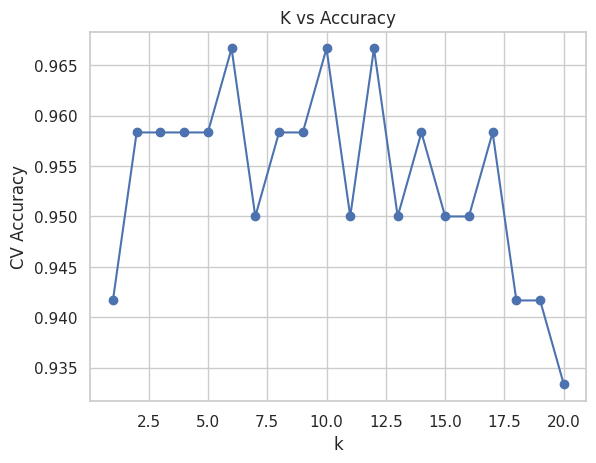

Best k: 6


In [5]:
ks = range(1, 21)
cv_scores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(ks, cv_scores, marker='o')
plt.xlabel('k')
plt.ylabel('CV Accuracy')
plt.title('K vs Accuracy')
plt.show()

best_k = ks[np.argmax(cv_scores)]
print("Best k:", best_k)


Test Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



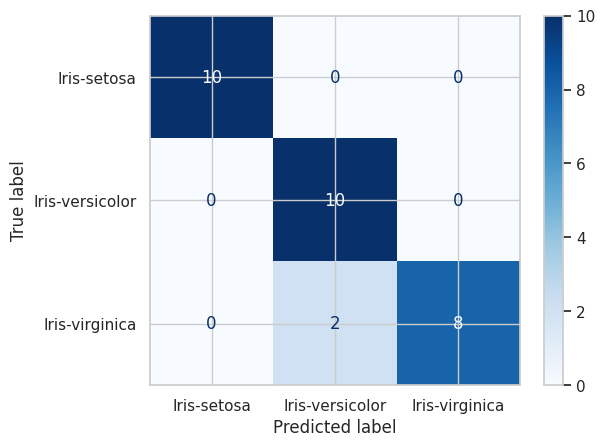

In [6]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

y_pred = knn_final.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.show()


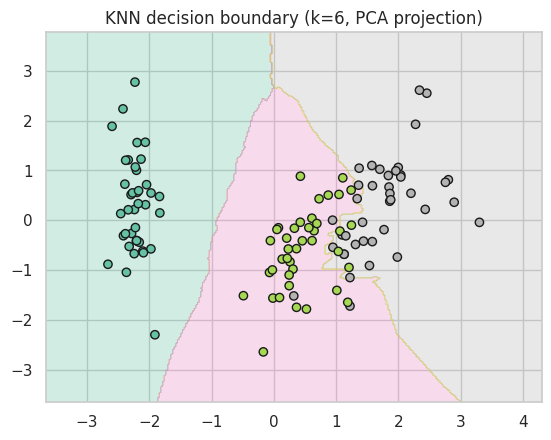

In [7]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_2d, y_train)

x_min, x_max = X_train_2d[:,0].min()-1, X_train_2d[:,0].max()+1
y_min, y_max = X_train_2d[:,1].min()-1, X_train_2d[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set2)
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train, edgecolor='k', cmap=plt.cm.Set2)
plt.title(f"KNN decision boundary (k={best_k}, PCA projection)")
plt.show()


In [8]:
pipeline = {'scaler': scaler, 'model': knn_final, 'label_encoder': le}
joblib.dump(pipeline, "iris_knn.joblib")
print("Saved as iris_knn.joblib")


Saved as iris_knn.joblib
